# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 2</p>
## <p style="text-align: center;">Total points: **60**</p>
## <p style="text-align: center;">Due: Monday, **Sep 27** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 


**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Shreya Bhootda

EID: SB 5853

Name: Emilio Cabrera

EID: EAC 4622

# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:

a) This is the bias of the estimator.

b) First, bias determines how good the average model is, while variance can determine how sensitive the model is to variations in data. An optimal model would have a low bias and low variance which would lead the model to never overfit or underfit the data, however a tradeoff exists in between both the bias and variance. If the model is too simple and has few paramters then it could have a high bias and low variance compared to a complex model (more parameters) which would have a high variance and a low bias. The tradeoff exists because no such model can simultaneiously be so complex and less complex by minimizing both bias and variance. 




# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


In [32]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_load = np.load('data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-4,4,101).reshape(-1,1)

lrp = LinearRegression()



In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

pol_reg = LinearRegression()

def fit_model(x_train, x_test, y_train, y_test, degree):
    X_poly_train = np.vander(np.squeeze(x_train), degree+1)
    X_poly_test = np.vander(np.squeeze(x_test), degree+1)
    pol_reg.fit(X_poly_train,y_train)
    
    print(mean_squared_error(pol_reg.predict(X_poly_test),y_test))
    return 

fit_model(x_train,x_test,y_train,y_test,2)
fit_model(x_train,x_test,y_train,y_test,4)
fit_model(x_train,x_test,y_train,y_test,7)


320.0640834697786
31.292082886606693
33.41069407769016


Mean squared error for degree on test data 2 320.0640834697786
Mean squared error for degree on train data 2 247.2967979737153
Mean squared error for degree on test data 4 31.292082886606693
Mean squared error for degree on train data 4 31.720018057290062
Mean squared error for degree on test data 7 33.41069407769016
Mean squared error for degree on train data 7 30.677193592109724


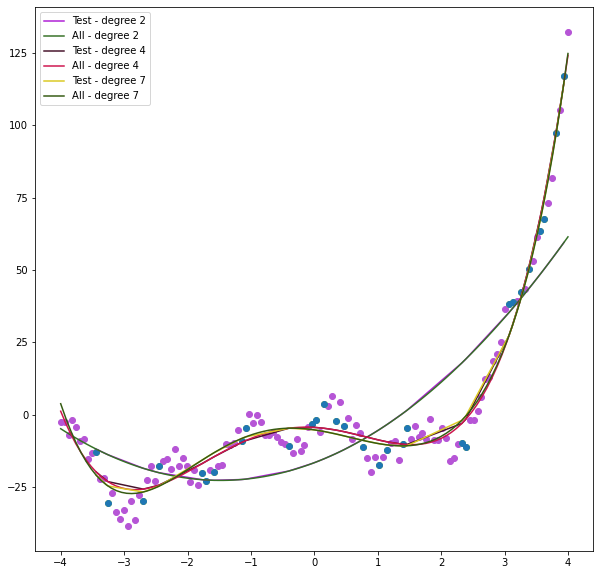

([247.2967979737153, 31.720018057290062, 30.677193592109724],
 [320.0640834697786, 31.292082886606693, 33.41069407769016])

In [45]:
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
import operator

pol_reg = LinearRegression()
def plot_curves(x_train, y_train, x_test, y_test, deg):
  # Fit polynomial models of degrees 2, 4, 7 to the training data. 
    #deg = [2, 4, 7]
    plt.figure(figsize=(10,10))
    train_rmses = []
    test_rmses = []
    rgb = [random.random(), random.random(), random.random()]
    plt.scatter(x_train,y_train,c=[rgb])
    rgb = np.random.rand(3,)
    plt.scatter(x_test,y_test,c=[rgb])
    plt.scatter(x_test,y_test)
    for i in deg:

      
      rgb = [random.random(), random.random(), random.random()]
      X_poly_train = np.vander(np.squeeze(x_train), i+1)
      X_poly_test = np.vander(np.squeeze(x_test), i+1)
      X_poly_all = np.vander(np.squeeze(x_all), i+1)
      pol_reg.fit(X_poly_train,y_train)
      
      y_pred_test = pol_reg.predict(X_poly_test)
      print('Mean squared error for degree on test data',i,mean_squared_error(y_pred_test,y_test))
      test_rmses.append(mean_squared_error(y_pred_test,y_test))
      sort_axis = operator.itemgetter(0)
      sorted_zip = sorted(zip(x_test,y_pred_test), key=sort_axis)
      x, y_pred_test = zip(*sorted_zip)
      rgb2 = [random.random(), random.random(), random.random()]
      plt.plot(x, y_pred_test, color=rgb2, label = 'Test - degree '+str(i))

      y_pred_train = pol_reg.predict(X_poly_train)
      print('Mean squared error for degree on train data',i,mean_squared_error(y_pred_train,y_train))
      train_rmses.append(mean_squared_error(y_pred_train,y_train))

      y_pred_all = pol_reg.predict(X_poly_all)
      sort_axis = operator.itemgetter(0)
      sorted_zip = sorted(zip(x_all,y_pred_all), key=sort_axis)
      x_new, y_pred_all = zip(*sorted_zip)
      rgb3 = [random.random(), random.random(), random.random()]
      plt.plot(x_new, y_pred_all, color=rgb3, label = 'All - degree '+str(i))
      
     
    plt.legend()  
    plt.show()
    return train_rmses, test_rmses

      
  # Print out the mean squared error (on both train and test sets) for all the models. 
  # Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). 

  # YOUR CODE COMES HERE
deg = [2, 4, 7] 
plot_curves(x_train, y_train, x_test, y_test,deg)


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

The model with degree 4 gave us the best performance. When we fit the model in the 2nd degree model the bias was very high which is why it gave the RMSE value of 320.064, when we increased the degree to 4 the bias reduced and the model fit the data well and the RMSE went down significantly - 31.29 . However, when we increased the degree to 4 the model overfit the data i.e. the variance increased and therefore the RMSE increased to 33.410.

In [ ]:
# Fit the different polynomials to the training data and make the plots 
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

20% data
Mean squared error for degree on test data 2 402.3231269099287
Mean squared error for degree on train data 2 161.17147378830043
Mean squared error for degree on test data 4 38.340744983442825
Mean squared error for degree on train data 4 35.11511313912978
Mean squared error for degree on test data 7 135.20764526756494
Mean squared error for degree on train data 7 22.543946691373257


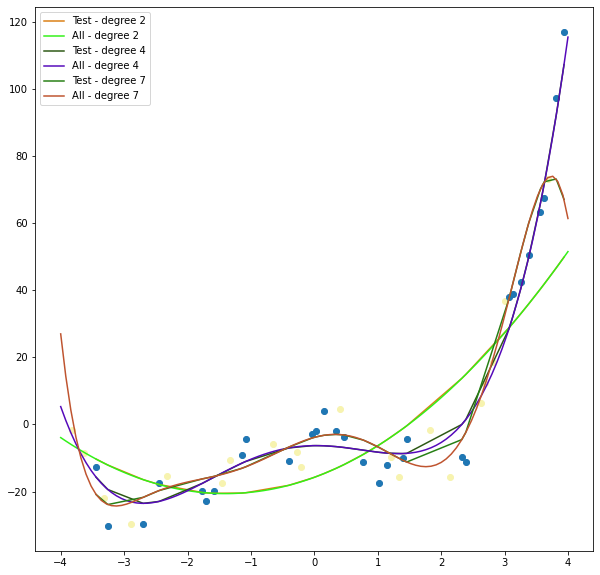

40% data
Mean squared error for degree on test data 2 405.8051669616576
Mean squared error for degree on train data 2 150.33251286085704
Mean squared error for degree on test data 4 33.16428295918743
Mean squared error for degree on train data 4 31.6245296464469
Mean squared error for degree on test data 7 61.23741884551061
Mean squared error for degree on train data 7 25.492718751653644


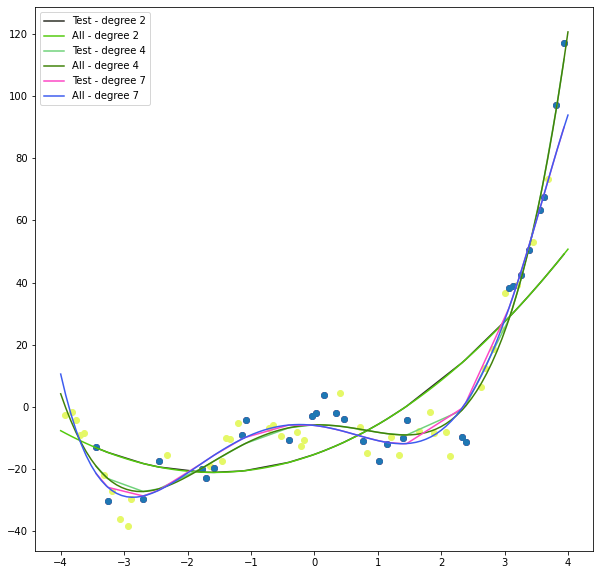

60% data
Mean squared error for degree on test data 2 403.2513784833407
Mean squared error for degree on train data 2 150.08383759141728
Mean squared error for degree on test data 4 31.781415416196726
Mean squared error for degree on train data 4 29.1928057399479
Mean squared error for degree on test data 7 60.166672376645124
Mean squared error for degree on train data 7 26.09908864245441


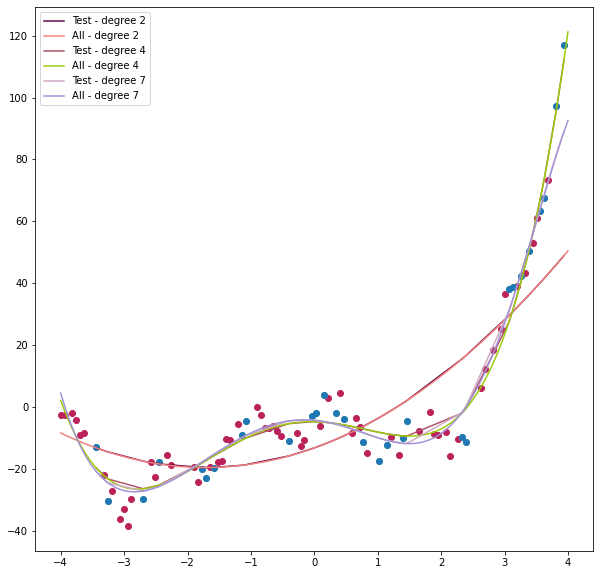

80% data
Mean squared error for degree on test data 2 407.59369688184705
Mean squared error for degree on train data 2 168.1188246150281
Mean squared error for degree on test data 4 32.5181068687426
Mean squared error for degree on train data 4 29.305108483323444
Mean squared error for degree on test data 7 48.076935297107646
Mean squared error for degree on train data 7 26.549129596283638


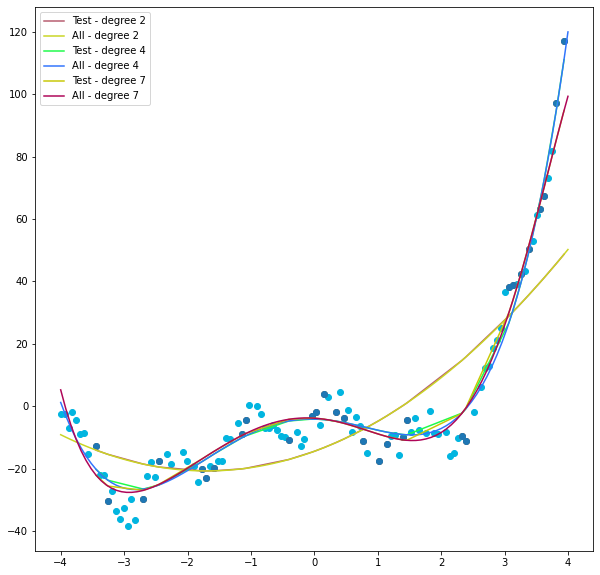

100% data
Mean squared error for degree on test data 2 320.0640834697786
Mean squared error for degree on train data 2 247.2967979737153
Mean squared error for degree on test data 4 31.292082886606693
Mean squared error for degree on train data 4 31.720018057290062
Mean squared error for degree on test data 7 33.41069407769016
Mean squared error for degree on train data 7 30.677193592109724


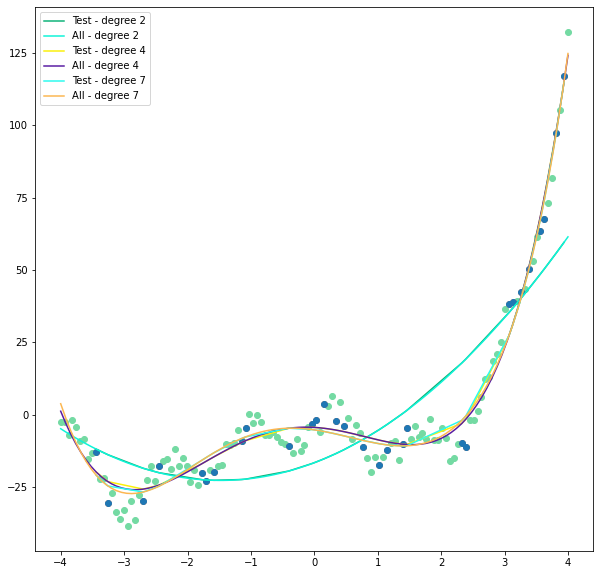

In [46]:
# Study the effects of the training data size on the bias and variance
deg_4 = [2, 4, 7]
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test, deg_4)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test, deg_4)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test, deg_4)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test, deg_4)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test, deg_4)

## Answer:

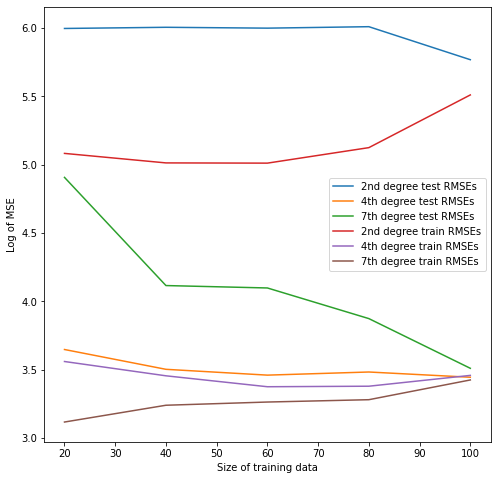

In [55]:
#plt.plt([20,40,60,80,10], list(test_rmses_20[0],test_rmses_40[0], test_rmses_60[0],tes))

plt.figure(figsize=(8,8))
for i in range(0, 3):
    label = ''
    if i ==0:
        lable = '2nd degree test RMSEs'
    elif i == 1:
        lable = '4th degree test RMSEs'
    else:
        lable = '7th degree test RMSEs'
    rgb = [random.random(), random.random(), random.random()]


    plt.plot([20,40,60,80,100], list(np.log([test_rmses_20[i], test_rmses_40[i], test_rmses_60[i], test_rmses_80[i], test_rmses_100[i]])), label = lable)
for i in range(0, 3):
    label = ''
    if i ==0:
        lable = '2nd degree train RMSEs'
    elif i == 1:
        lable = '4th degree train RMSEs'
    else:
        lable = '7th degree train RMSEs'
    rgb = [random.random(), random.random(), random.random()]
    

    plt.plot([20,40,60,80,100], list(np.log([train_rmses_20[i], train_rmses_40[i], train_rmses_60[i], train_rmses_80[i], train_rmses_100[i]])), label = lable)
plt.xlabel("Size of training data")
plt.ylabel('Log of MSE')
plt.legend()
plt.show()

Training set size on an average across the 3 degrees reduces the RMSE value. The RMSE value increases with data size in case degree 7 due to overfitting. However, does not effect the RMSE value for the 4th degree a lot which might mean that the error was not because of high variance but due to high bias instead. The test RMSE curve for degree 2 stays relatively flat initially and then reduces inidcating a high bias or underfitting.

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

## a) 
 The Stochastic gradient descent has the following advantages over gradient descent :
   - Faster in computation if the training data set is very large
   - Can handle non-stationary data as well. For eg. input signals
   - Its handles complex functions/surface well as it's less prone to local minima
   - Can be used to scale input data to find the learning rate
  The advantages of gradient descent over stochastic gradient descent is :
   - The error function is more minimized in comparison 
## b) 
  The Nelder-Mead method over comes the problem of iterating using a fixed step size and works by dynamically adjusting its step size based off the loss between the two previous points. If a new point is better (lower as minimization is the objective), then the step-size will automatically increase to accelerate to the bottom, where as if it were reaching a higher point, then the step size will decrease/contract to avoid maximization.

  What can be the major problems of Nelder-Mead method?**
  
  Despite working well for lower dimensional functions, the Nelder-Mead method does not well in the multi-dimensional space and Machine Learning models can often grow in size to billions of parameters. The Nelder-Mead method cannot tackle simple problems with models beyond 12 parameters or so. This is a directional related issue where in a 2-D space, figuring out a direction is relatively simple, and increasing the dimensionality can cause direction to be exponentially more difficult to determine.

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

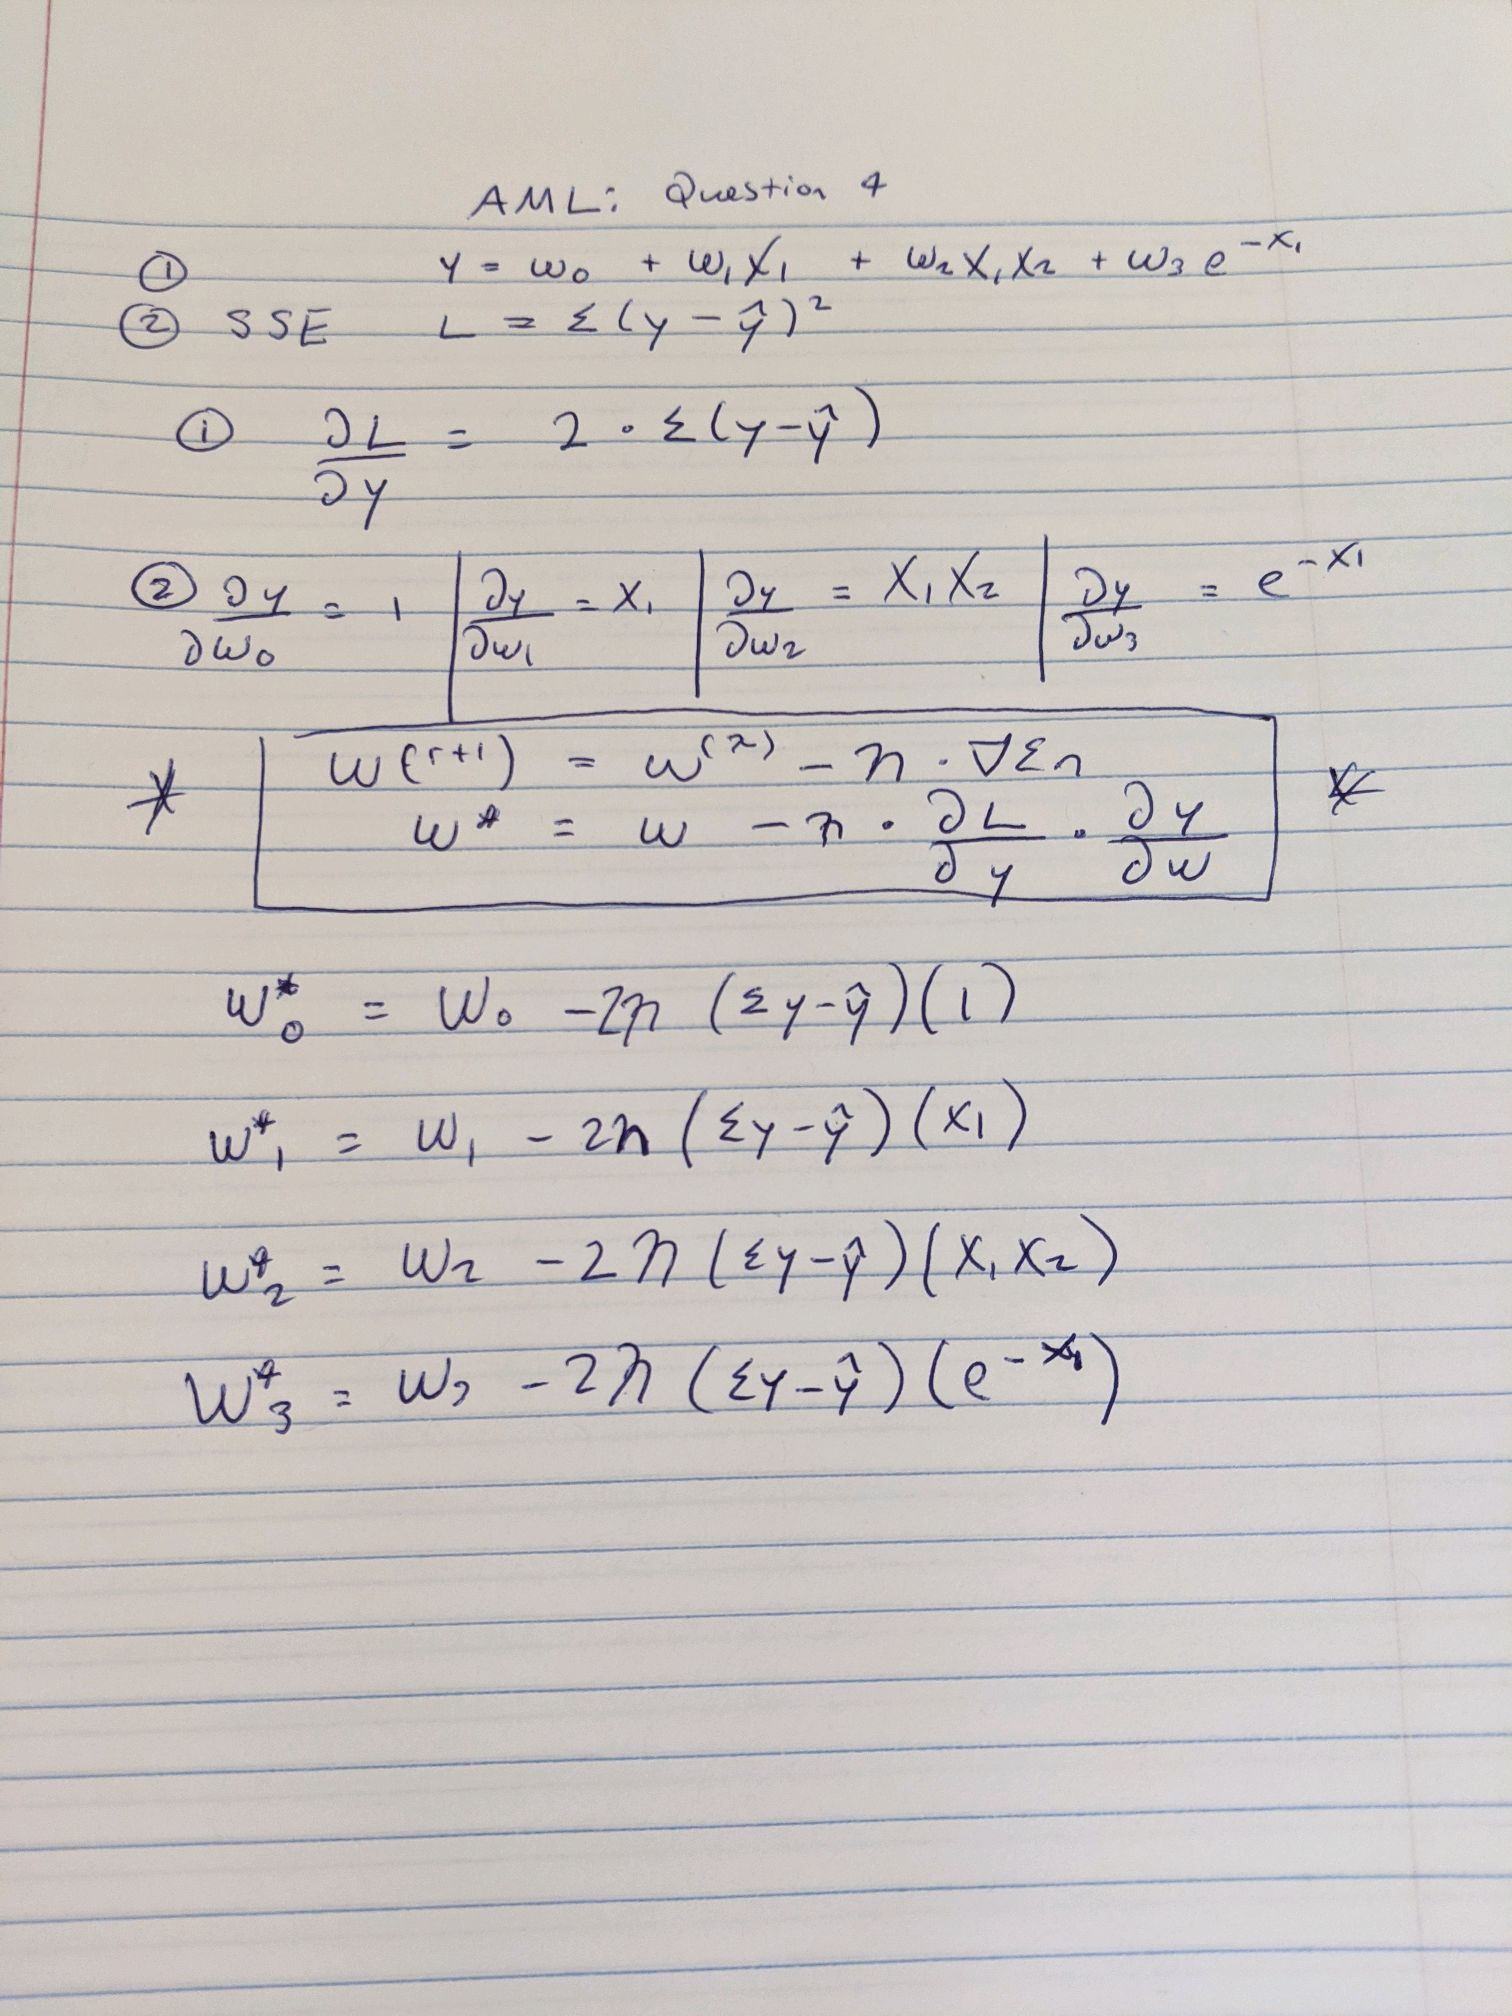

In [53]:
from IPython.display import Image
Image(filename='derivation_aml_assign2.jpeg',width=10, height=10)

# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [30]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate*gradient
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
               
                X_i = X[i,:]

                #calculate error
                error_i = self.linearPredict(X[i,:]) - y[i]
                gradient = 2*error_i*X_i + self.regularization*self.coef
                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):  
      
      return X.dot(self.coef) 

<ipython-input-30-60afba7ee310>:28: RuntimeWarning: overflow encountered in multiply
  gradient = 2*error_i*X_i + self.regularization*self.coef
<ipython-input-30-60afba7ee310>:17: RuntimeWarning: invalid value encountered in subtract
  self.coef = self.coef - self.learning_rate*gradient
<ipython-input-30-60afba7ee310>:36: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
<ipython-input-30-60afba7ee310>:28: RuntimeWarning: invalid value encountered in multiply
  gradient = 2*error_i*X_i + self.regularization*self.coef
<ipython-input-30-60afba7ee310>:28: RuntimeWarning: overflow encountered in double_scalars
  gradient = 2*error_i*X_i + self.regularization*self.coef
<ipython-input-30-60afba7ee310>:17: RuntimeWarning: overflow encountered in multiply
  self.coef = self.coef - self.learning_rate*gradient


The first best learning rate and regularization combination:  (0.01, 0)
The second best learning rate and regularization combination:  (0.001, 0)
The MSE values for the two best combinations are:  0.027444548002430146  and  0.028842167362254173


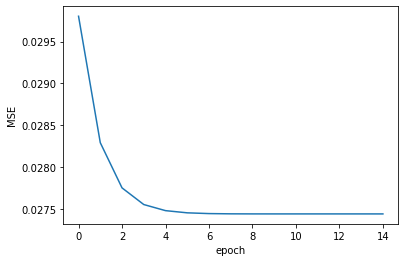

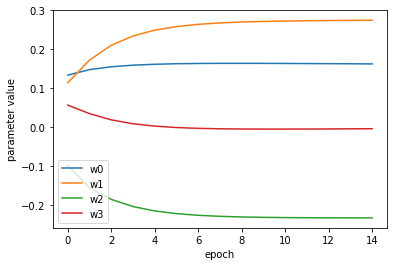

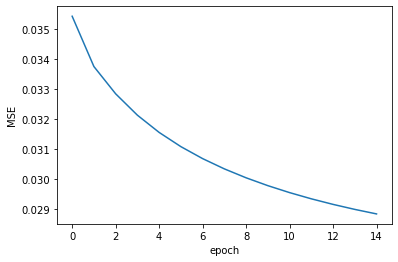

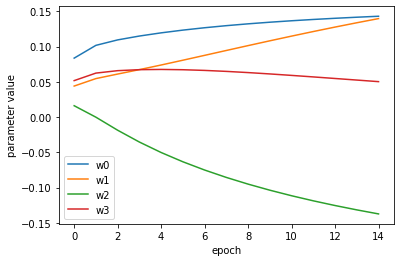

In [31]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

mse_scores = []
#creating a combination of the available learning and regularization rates
lr_reg = []
for lr in range (0, len(learning_rate)) :
    for reg in range(0, len(regularization)):
        lr_reg.append((learning_rate[lr],regularization[reg]))

for i in range(0,len(lr_reg)):
    sgd_reg = Regression(lr_reg[i][0], lr_reg[i][1], n_epochs)
    sgd_reg.fit(X,y,plot=False)
    mse_scores.append(sgd_reg.lowest_mse)

# get indixes of the 2 least MSE scores

top_2_lr_reg = np.argsort(np.array(mse_scores))[:2]
print("The first best learning rate and regularization combination: ",lr_reg[top_2_lr_reg[0]])
print("The second best learning rate and regularization combination: ",lr_reg[top_2_lr_reg[1]])
mse_score_bestcombo = []
for i in top_2_lr_reg:
    sgd_reg = Regression(lr_reg[i][0], lr_reg[i][1], n_epochs)
    sgd_reg.fit(X, y, plot=True)
    mse_score_bestcombo.append(sgd_reg.lowest_mse)
print('The MSE values for the two best combinations are: ',mse_score_bestcombo[0],' and ', mse_score_bestcombo[1])